Load Diabetes dataset from [scikit-learn.org](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset)

In [2]:
%matplotlib inline
from sklearn.datasets import load_diabetes

In [3]:
diabetes = load_diabetes()

Display Diabetes description

In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

Confirm number of samples/features, number of targets, feature names

In [5]:
diabetes.data.shape

(442, 10)

In [6]:
diabetes.target.shape

(442,)

In [7]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

Exploring data with Pandas

In [8]:
import pandas as pd

In [9]:
pd.set_option('precision', 4)  # 4 digit precision for floats

In [10]:
diabetes_df = pd.DataFrame(diabetes.data, 
                             columns=diabetes.feature_names)

In [11]:
diabetes_df['DiseaseProgression'] = pd.Series(diabetes.target)

In [12]:
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DiseaseProgression
0,0.0381,0.0507,0.0617,0.0219,-0.0442,-0.0348,-0.0434,-0.0026,0.0199,-0.0176,151.0
1,-0.0019,-0.0446,-0.0515,-0.0263,-0.0084,-0.0192,0.0744,-0.0395,-0.0683,-0.0922,75.0
2,0.0853,0.0507,0.0445,-0.0057,-0.0456,-0.0342,-0.0324,-0.0026,0.0029,-0.0259,141.0
3,-0.0891,-0.0446,-0.0116,-0.0367,0.0122,0.0250,-0.0360,0.0343,0.0227,-0.0094,206.0
4,0.0054,-0.0446,-0.0364,0.0219,0.0039,0.0156,0.0081,-0.0026,-0.0320,-0.0466,135.0


Calculate DataFrame's summary statistics

In [15]:
diabetes_df.describe()
diabetes_df.round(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DiseaseProgression
0,0.0381,0.0507,0.0617,0.0219,-0.0442,-0.0348,-0.0434,-0.0026,0.0199,-0.0176,151.0
1,-0.0019,-0.0446,-0.0515,-0.0263,-0.0084,-0.0192,0.0744,-0.0395,-0.0683,-0.0922,75.0
2,0.0853,0.0507,0.0445,-0.0057,-0.0456,-0.0342,-0.0324,-0.0026,0.0029,-0.0259,141.0
3,-0.0891,-0.0446,-0.0116,-0.0367,0.0122,0.0250,-0.0360,0.0343,0.0227,-0.0094,206.0
4,0.0054,-0.0446,-0.0364,0.0219,0.0039,0.0156,0.0081,-0.0026,-0.0320,-0.0466,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.0417,0.0507,0.0197,0.0597,-0.0057,-0.0026,-0.0287,-0.0026,0.0312,0.0072,178.0
438,-0.0055,0.0507,-0.0159,-0.0676,0.0493,0.0792,-0.0287,0.0343,-0.0181,0.0445,104.0
439,0.0417,0.0507,-0.0159,0.0173,-0.0373,-0.0138,-0.0250,-0.0111,-0.0469,0.0155,132.0
440,-0.0455,-0.0446,0.0391,0.0012,0.0163,0.0153,-0.0287,0.0266,0.0445,-0.0259,220.0


Visualizing the features

In [16]:
sample_df = diabetes_df.sample(frac=0.1, random_state=17)


*   Display scatterplots of several features
*   Each shows feature on x-axis and disease progression on y-axis


In [ ]:
import matplotlib.pyplot as plt


In [18]:
import seaborn as sns

In [19]:
# sns.set(font_scale=2)

In [ ]:
sns.set_style('whitegrid')

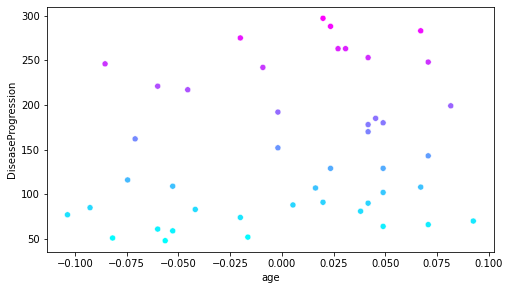

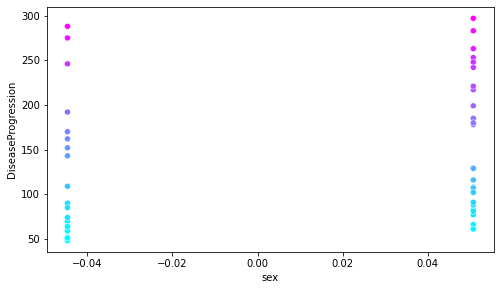

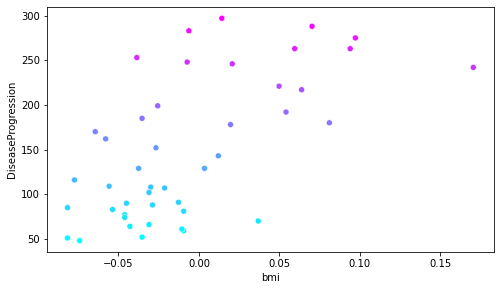

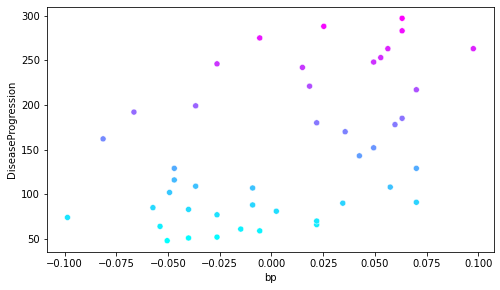

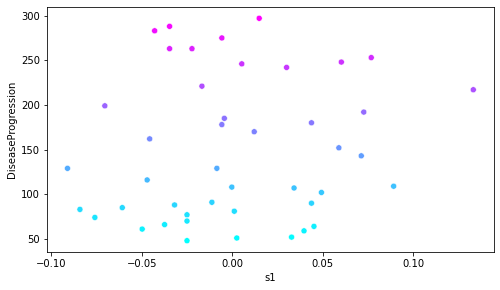

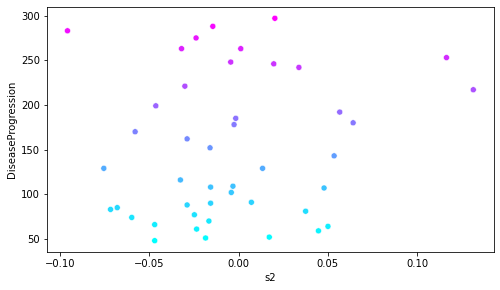

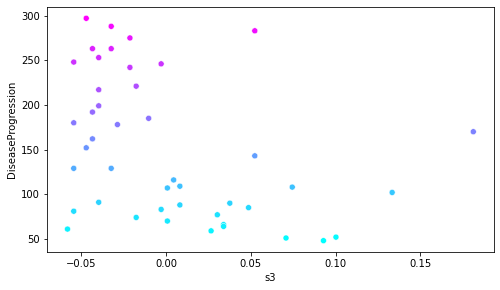

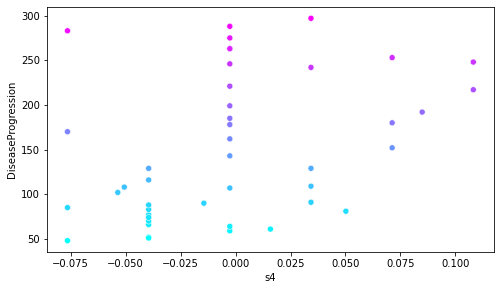

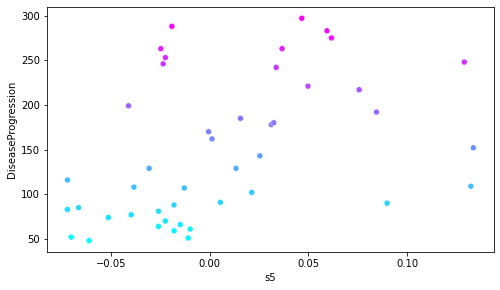

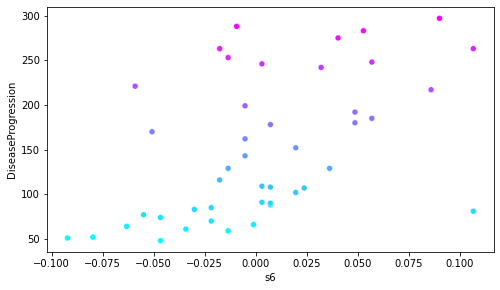

In [20]:
for feature in diabetes.feature_names:
    plt.figure(figsize=(8, 4.5)) #8" -by -4.5" Figure
    sns.scatterplot(data=sample_df, x=feature,
                    y='DiseaseProgression', hue='DiseaseProgression',
                    palette='cool', legend=False)

Splitting the data for training and testing using train_test_split

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, random_state=11)

In [23]:
X_train.shape

(331, 10)

In [24]:
X_test.shape

(111, 10)

Training the model
*   LinearRegression tries to use all features in a dataset's data array

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
linear_regression = LinearRegression()

In [27]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

Training the model (cont.)

* Separate coeffiecients for each feature(stored in coeff_) and one intercept(stored in intercept_)   

In [28]:
for i, name in enumerate(diabetes.feature_names):
    print(f'{name:>10}: {linear_regression.coef_[i]}') 

       age: -60.221893331882335
       sex: -266.45890749037505
       bmi: 523.0596748020042
        bp: 310.51485159166873
        s1: -336.17030792547865
        s2: 137.344544538294
        s3: -131.13560429688624
        s4: -1.1485501589064313
        s5: 622.3374924905781
        s6: 60.46751763603552


In [29]:
linear_regression.intercept_

152.22835839334243

Testing the model

*   Use the estimator's predict method


In [30]:
predicted = linear_regression.predict(X_test)

In [31]:
expected = y_test

In [32]:
predicted[:5]  # first 5 predictions

array([115.46727109,  83.46033257, 160.77912055, 187.65807631,
        72.72355267])

In [33]:
expected[:5]   # first five targets

array([ 79.,  55., 109., 178.,  39.])

Visualizing the expected vs. predicted values

*   Create a DataFrame containing columns for the expected and predicted values




In [34]:
df = pd.DataFrame()

In [35]:
df['Expected'] = pd.Series(expected)

In [36]:
df['Predicted'] = pd.Series(predicted)

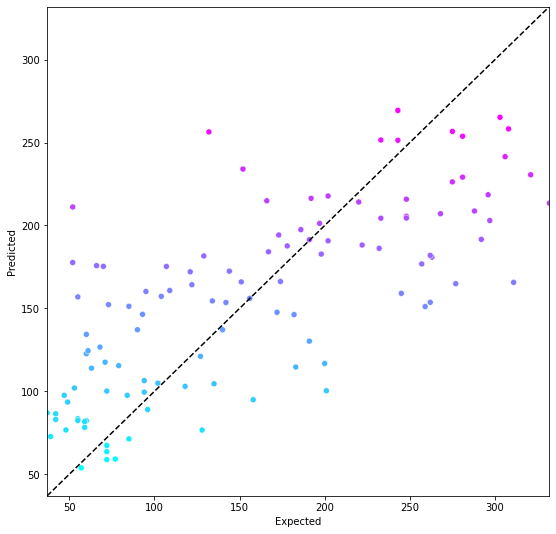

In [37]:
figure = plt.figure(figsize=(9, 9))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted', 
    hue='Predicted', palette='cool', legend=False)

start = min(expected.min(), predicted.min())

end = max(expected.max(), predicted.max())

axes.set_xlim(start, end)

axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')

Regression Model Metrics

*   Metrics for regression estimators include coeffecient of determination




In [38]:
from sklearn import metrics

In [39]:
metrics.r2_score(expected, predicted)

0.5322440129151977

Choosing the best model

In [40]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge

In [41]:
estimators = {
    'LinearRegression': linear_regression,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

Choosing the best model (cont.)

*   Run the estimators using k-fold cross-validation
*   cross_val_score argument scoring='r2' - report R^2 scores for each fold



In [42]:
from sklearn.model_selection import KFold, cross_val_score

In [43]:
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object, 
        X=diabetes.data, y=diabetes.target, cv=kfold,
        scoring='r2')
    print(f'{estimator_name:>16}: ' + 
          f'mean of r2 scores={scores.mean():.3f}')

LinearRegression: mean of r2 scores=0.475
      ElasticNet: mean of r2 scores=-0.002
           Lasso: mean of r2 scores=0.339
           Ridge: mean of r2 scores=0.421


Since 1.0 is considered the best, Linear Regression and Ridge appear to be the best models for this dataset.